## NOTES:
* embedded is code to calculate each star school rank breakdown of absences percentages
* embedded is code to extract school_ward_int and school_cluster_int columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
data = pd.read_csv('../data/cleaned/school_df_v4.csv')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      109 non-null    int64  
 1   name                      109 non-null    object 
 2   grade_band                109 non-null    object 
 3   enrollment_SY1718         109 non-null    int64  
 4   enrollment_SY1819         109 non-null    int64  
 5   star_score_SY1718         109 non-null    float64
 6   star_score_SY1819         109 non-null    float64
 7   star_rating_SY1718        109 non-null    int64  
 8   star_rating_SY1819        109 non-null    int64  
 9   capacity_SY1718           109 non-null    int64  
 10  capacity_SY1819           109 non-null    int64  
 11  latitude                  109 non-null    float64
 12  longitude                 109 non-null    float64
 13  cluster                   109 non-null    int64  
 14  ward      

In [49]:
data.drop(data[data['code'] == 201].index, inplace = True) # Oyster Adams Bilingual School (Adams) has no attendance data
data.drop(data[data['code'] == 347].index, inplace = True) # Brookland Middle School has no attendance data

In [50]:
X = data.drop(columns = data.filter(regex='^count',axis=1)).drop(columns='name')

In [51]:
X.drop('code', axis = 1, inplace = True)

In [52]:
from category_encoders import OneHotEncoder 

X_ohe = OneHotEncoder(cols=['grade_band']).fit_transform(X)
X_ohe

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


grade_band_1  grade_band_2  grade_band_3  grade_band_4  grade_band_5  \
0               1             0             0             0             0   
2               1             0             0             0             0   
3               1             0             0             0             0   
4               1             0             0             0             0   
5               1             0             0             0             0   
..            ...           ...           ...           ...           ...   
104             0             0             0             1             0   
105             0             0             0             1             0   
106             0             0             0             1             0   
107             0             0             0             1             0   
108             0             0             0             1             0   

     enrollment_SY1718  enrollment_SY1819  star_score_SY1718  \
0                  308                313              88.55   
2                  243                244              43.85   
3                  351                339              36.53   
4                  642                620              66.46   
5                  484                489              35.32   
..                 ...                ...                ...   
104                617                667              26.57   
105                566                545              72.66   
106                195                136              24.88   
107                260                265              44.70   
108                251                288              29.69   

     star_score_SY1819  star_rating_SY1718  ...  pct_20+_SY1819  pct_0_SY1718  \
0                88.26                   5  ...        0.015974      0.379870   
2                10.79                   3  ...        0.086066      0.271605   
3                48.54                   2  ...        0.029499      0.159544   
4                73.18                   4  ...        0.017742      0.323988   
5                38.68                   2  ...        0.010225      0.371901   
..                 ...                 ...  ...             ...           ...   
104              22.24                   2  ...        0.761619     -0.069692   
105              74.13                   4  ...        0.291743      0.084806   
106              12.90                   2  ...        0.955882     -0.005128   
107              54.27                   3  ...        0.283019      0.007692   
108              -1.00                   2  ...        0.017361      0.286853   

     pct_1-5_SY1718  pct_6-10__SY1718  pct_11-20_SY1718  pct_20+_SY1718  \
0          0.538961          0.064935          0.016234        0.000000   
2          0.304527          0.238683          0.135802        0.049383   
3          0.424501          0.279202          0.102564        0.034188   
4          0.588785          0.063863          0.015576        0.007788   
5          0.520661          0.097107          0.010331        0.000000   
..              ...               ...               ...             ...   
104        0.059968          0.098865          0.265802        0.645057   
105        0.395760          0.178445          0.196113        0.144876   
106        0.025641          0.025641          0.025641        0.928205   
107        0.134615          0.188462          0.361538        0.307692   
108        0.067729          0.063745          0.139442        0.442231   

     budgeted_amount_FY16  budgeted_enrollment_FY16  budgeted_amount_FY17  \
0            1.059280e+07                      5880               3815456   
2            7.429920e+06                      2650               3780814   
3            8.979878e+06                      3660               4533018   
4            1.519980e+07                      6340               7531184   
5            1.102686e+07                      4340 

In [53]:
from sklearn.preprocessing import StandardScaler

X_ohe_ss = StandardScaler().fit_transform(X_ohe)

In [54]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [55]:
kmeans = KMeans()
kmeans.fit(X_ohe_ss)

KMeans()

In [56]:
kmeans_df = X.copy()
kmeans_df['kmeans_default_labels'] = kmeans.labels_
kmeans_df

grade_band  enrollment_SY1718  enrollment_SY1819  star_score_SY1718  \
0    Elementary                308                313              88.55   
2    Elementary                243                244              43.85   
3    Elementary                351                339              36.53   
4    Elementary                642                620              66.46   
5    Elementary                484                489              35.32   
..          ...                ...                ...                ...   
104        High                617                667              26.57   
105        High                566                545              72.66   
106        High                195                136              24.88   
107        High                260                265              44.70   
108        High                251                288              29.69   

     star_score_SY1819  star_rating_SY1718  star_rating_SY1819  \
0                88.26                   5                   5   
2                10.79                   3                   1   
3                48.54                   2                   3   
4                73.18                   4                   4   
5                38.68                   2                   2   
..                 ...                 ...                 ...   
104              22.24                   2                   2   
105              74.13                   4                   4   
106              12.90                   2                   1   
107              54.27                   3                   3   
108              -1.00                   2                  -1   

     capacity_SY1718  capacity_SY1819   latitude  ...  pct_0_SY1718  \
0                444              444  38.897565  ...      0.379870   
2                529              529  38.897002  ...      0.271605   
3                400              400  38.879515  ...      0.159544   
4                753              753  38.948231  ...      0.323988   
5                508              508  38.864350  ...      0.371901   
..               ...              ...        ...  ...           ...   
104             1135             1135  38.907627  ...     -0.069692   
105              600              600  38.913446  ...      0.084806   
106               -1               -1  38.920430  ...     -0.005128   
107              512              512  38.901992  ...      0.007692   
108              350              350  38.932276  ...      0.286853   

     pct_1-5_SY1718  pct_6-10__SY1718  pct_11-20_SY1718  pct_20+_SY1718  \
0          0.538961          0.064935          0.016234        0.000000   
2          0.304527          0.238683          0.135802        0.049383   
3          0.424501          0.279202          0.102564        0.034188   
4          0.588785          0.063863          0.015576        0.007788   
5          0.520661          0.097107          0.010331        0.000000   
..              ...               ...               ...             ...   
104        0.059968          0.098865          0.265802        0.645057   
105        0.395760          0.178445          0.196113        0.144876   
106        0.025641          0.025641          0.025641        0.928205   
107        0.134615          0.188462          0.361538        0.307692   
108        0.067729          0.063745          0.139442        0.442231   

     budgeted_amount_FY16  budgeted_enrollment_FY16  budgeted_amount_FY17  \
0            1.059280e+07                      5880               3815456   
2            7.429920e+06                      2650               3780814   
3            8.979878e+06                      3660               4533018   
4            1.519980e+07                      6340               7531184   
5            1.102686e+07                      4340               5511270   
..                    ...                       ...                   ...   
104   

In [59]:
kmeans.inertia_

1252.7414502794634

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


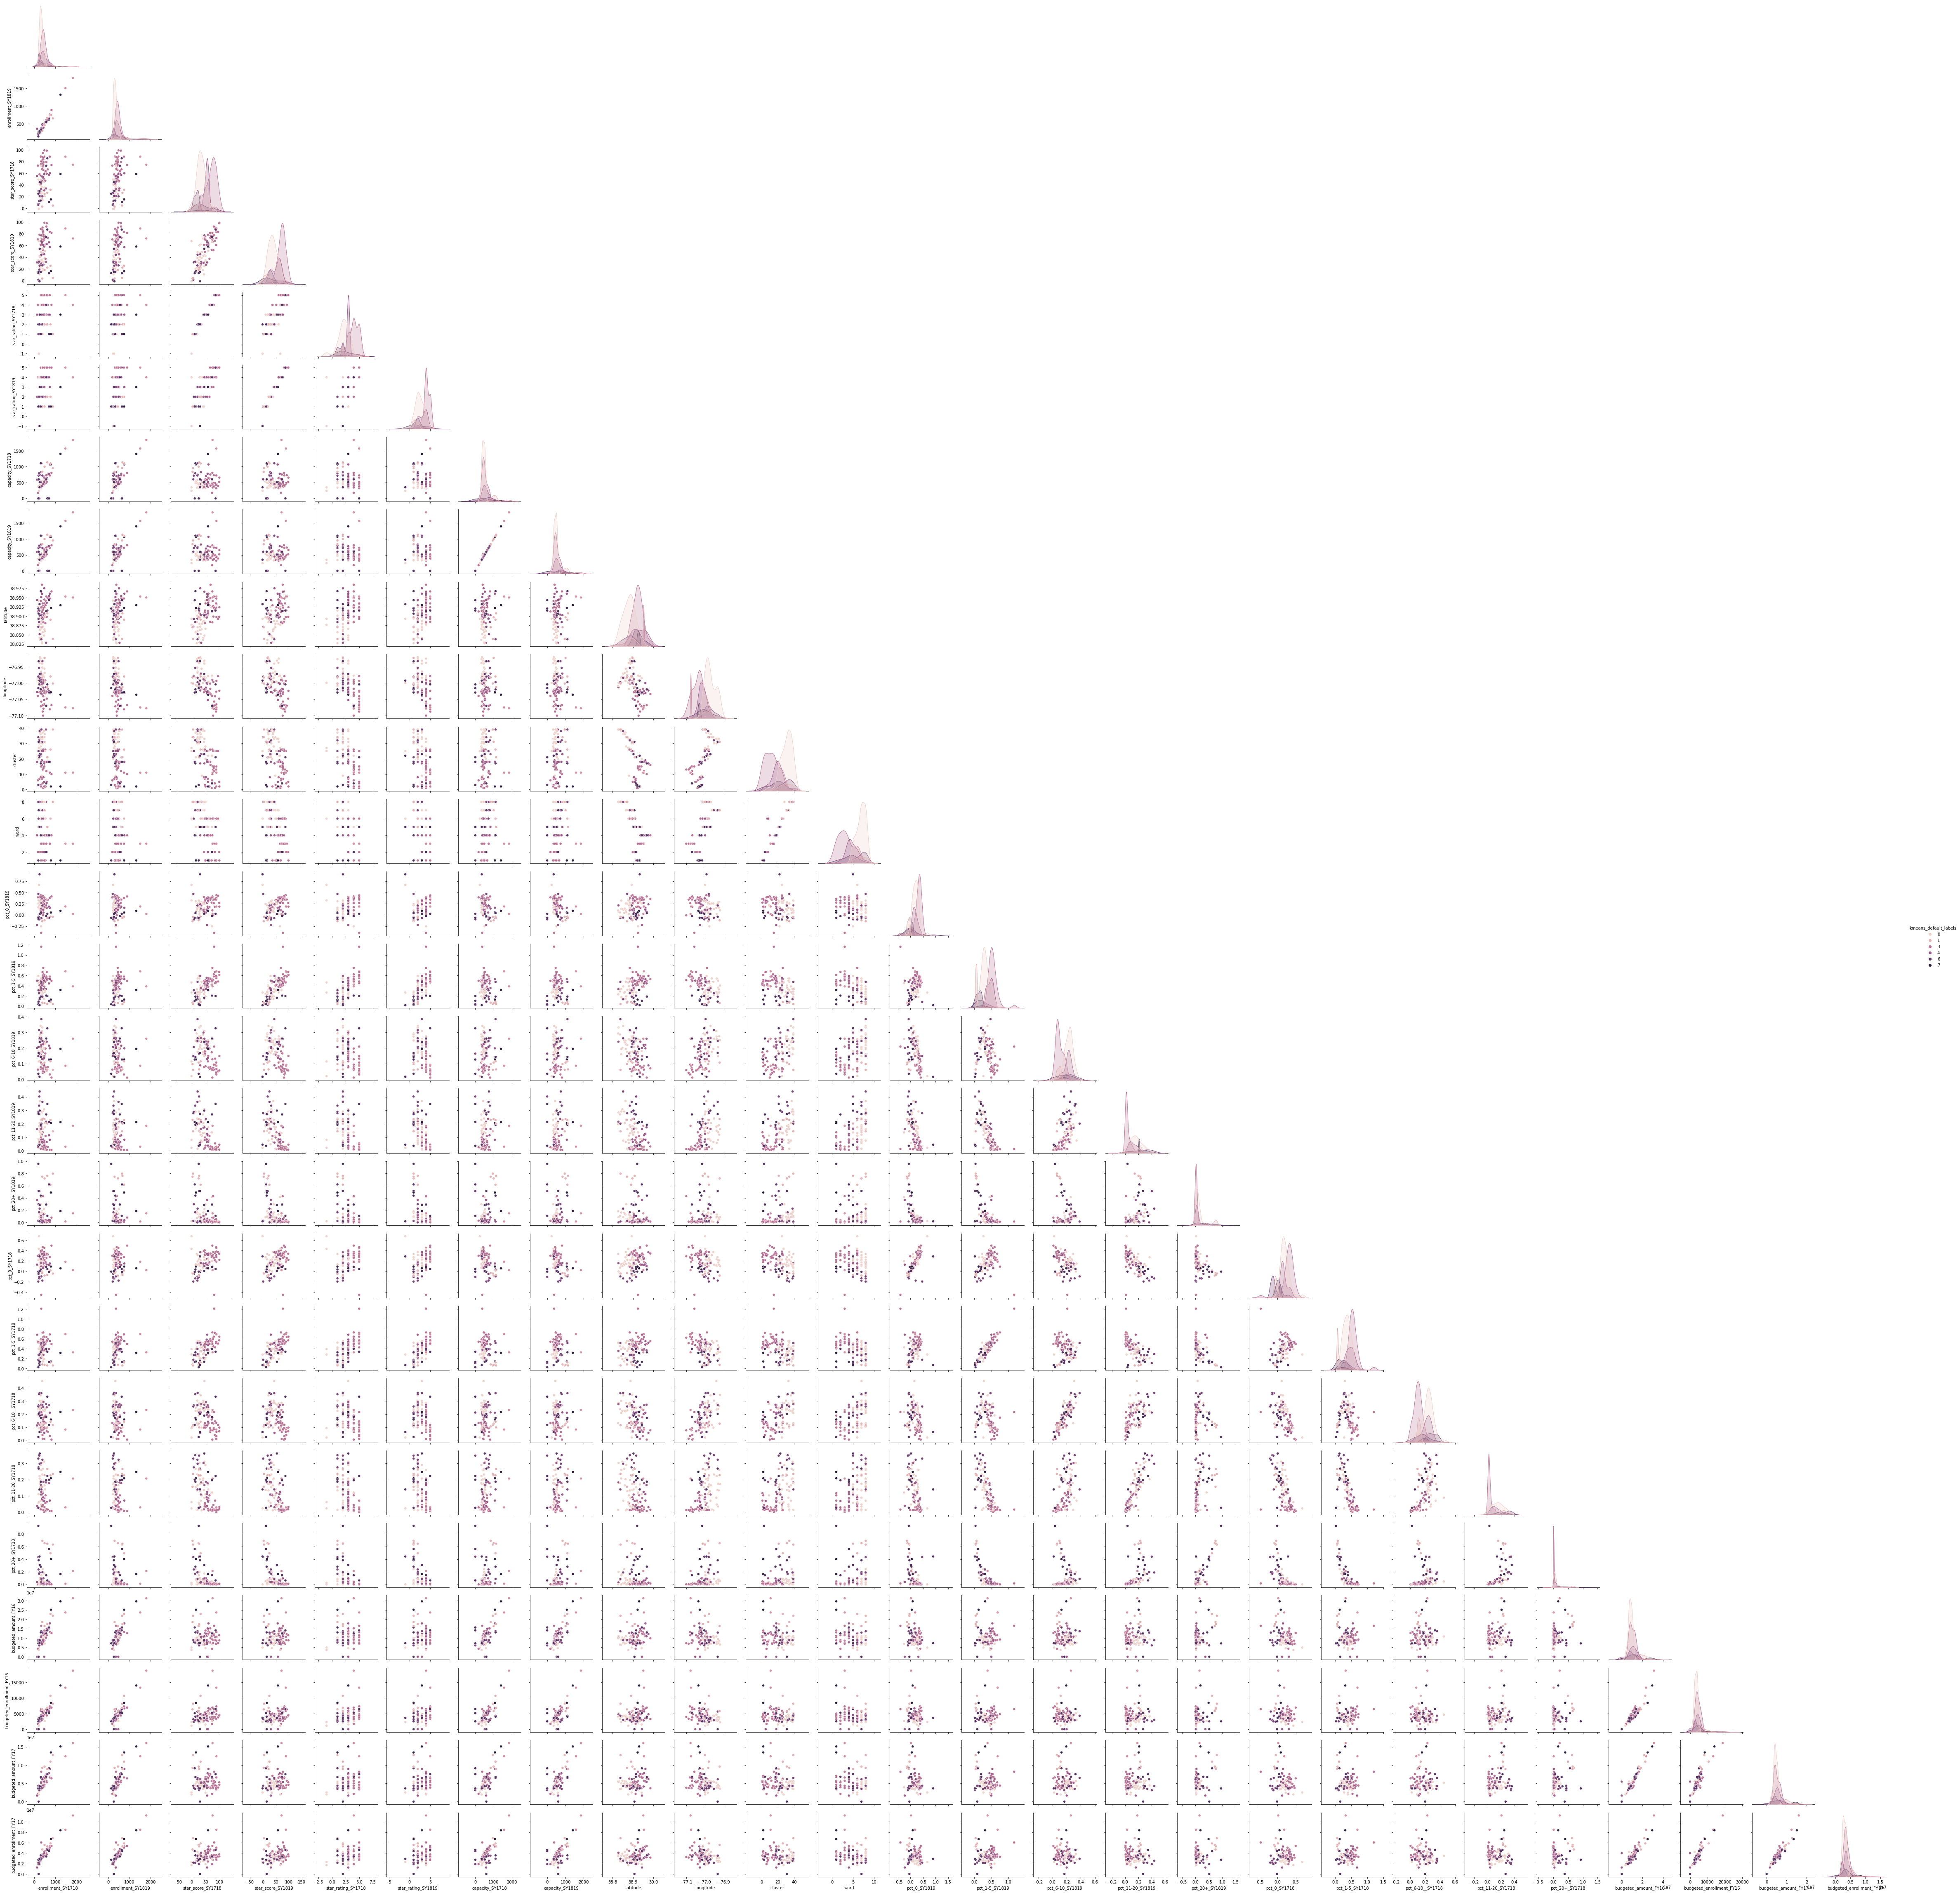

In [57]:
sns.pairplot(kmeans_df, hue='kmeans_default_labels', corner=True);

In [58]:
kmeans_df.groupby('kmeans_default_labels').mean()

enrollment_SY1718  enrollment_SY1819  \
kmeans_default_labels                                         
0                             325.714286         321.285714   
1                             626.600000         562.400000   
2                            1652.000000        1651.500000   
3                             440.125000         450.218750   
4                             435.687500         449.562500   
5                             263.571429         289.571429   
6                             388.625000         387.500000   
7                            1014.000000        1033.000000   

                       star_score_SY1718  star_score_SY1819  \
kmeans_default_labels                                         
0                              32.759429          37.528857   
1                              18.056000          14.908000   
2                              81.340000          80.460000   
3                              72.871563          73.110625   
4                              49.798125          52.088750   
5                              16.285714          25.675714   
6                              38.848750          33.740000   
7                              36.855000          37.145000   

                       star_rating_SY1718  star_rating_SY1819  \
kmeans_default_labels                                           
0                                2.085714            2.371429   
1                                1.600000            1.400000   
2                                4.500000            4.500000   
3                                4.093750            4.156250   
4                                2.812500            3.187500   
5                                1.571429            1.857143   
6                                2.500000            1.875000   
7                                2.000000            2.000000   

                       capacity_SY1718  capacity_SY1819   latitude  longitude  \
kmeans_default_labels                                                           
0                           436.800000       439.657143  38.880892 -76.971908   
1                          1005.400000      1005.400000  38.880682 -76.979829   
2                          1705.000000      1705.000000  38.951527 -77.076487   
3                           488.312500       491.437500  38.922752 -77.037153   
4                           577.750000       577.750000  38.923992 -77.014063   
5                           667.857143       667.857143  38.877889 -76.975681   
6                           395.500000       395.500000  38.925030 -77.004463   
7                          1235.000000      1235.000000  38.925859 -77.032164   

                       ...  pct_20+_SY1819  pct_0_SY1718  pct_1-5_SY1718  \
kmeans_default_labels  ...                                                 
0                      ...        0.092661      0.204877        0.359231   
1                      ...        0.727887     -0.042707        0.079599   
2                      ...        0.081353      0.103958        0.510049   
3                      ...        0.031560      0.296834        0.562255   
4                      ...        0.066925      0.172332        0.453134   
5                      ...        0.176718     -0.128923        0.288276   
6                      ...        0.403091      0.054409        0.197044   
7                      ...        0.336771      0.074718        0.227690   

                       pct_6-10__SY1718  pct_11-20_SY1718  pct_20+_SY1718  \
kmeans_default_labels                                                       
0                              0.233200          0.145223        0.057469   
1                              0.117821          0.222086        0.623201   
2                              0.156993          0.117572        0.111427   
3                              0.102556          0.028491        0.009864   
4                              0.215674          0.117841        0.041019   

In [77]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X_ohe_ss)

KMeans(n_clusters=11)

In [78]:
kmeans_df = X.copy()
kmeans_df['kmeans_default_labels'] = kmeans.labels_
kmeans_df

grade_band  enrollment_SY1718  enrollment_SY1819  star_score_SY1718  \
0    Elementary                308                313              88.55   
2    Elementary                243                244              43.85   
3    Elementary                351                339              36.53   
4    Elementary                642                620              66.46   
5    Elementary                484                489              35.32   
..          ...                ...                ...                ...   
104        High                617                667              26.57   
105        High                566                545              72.66   
106        High                195                136              24.88   
107        High                260                265              44.70   
108        High                251                288              29.69   

     star_score_SY1819  star_rating_SY1718  star_rating_SY1819  \
0                88.26                   5                   5   
2                10.79                   3                   1   
3                48.54                   2                   3   
4                73.18                   4                   4   
5                38.68                   2                   2   
..                 ...                 ...                 ...   
104              22.24                   2                   2   
105              74.13                   4                   4   
106              12.90                   2                   1   
107              54.27                   3                   3   
108              -1.00                   2                  -1   

     capacity_SY1718  capacity_SY1819   latitude  ...  pct_0_SY1718  \
0                444              444  38.897565  ...      0.379870   
2                529              529  38.897002  ...      0.271605   
3                400              400  38.879515  ...      0.159544   
4                753              753  38.948231  ...      0.323988   
5                508              508  38.864350  ...      0.371901   
..               ...              ...        ...  ...           ...   
104             1135             1135  38.907627  ...     -0.069692   
105              600              600  38.913446  ...      0.084806   
106               -1               -1  38.920430  ...     -0.005128   
107              512              512  38.901992  ...      0.007692   
108              350              350  38.932276  ...      0.286853   

     pct_1-5_SY1718  pct_6-10__SY1718  pct_11-20_SY1718  pct_20+_SY1718  \
0          0.538961          0.064935          0.016234        0.000000   
2          0.304527          0.238683          0.135802        0.049383   
3          0.424501          0.279202          0.102564        0.034188   
4          0.588785          0.063863          0.015576        0.007788   
5          0.520661          0.097107          0.010331        0.000000   
..              ...               ...               ...             ...   
104        0.059968          0.098865          0.265802        0.645057   
105        0.395760          0.178445          0.196113        0.144876   
106        0.025641          0.025641          0.025641        0.928205   
107        0.134615          0.188462          0.361538        0.307692   
108        0.067729          0.063745          0.139442        0.442231   

     budgeted_amount_FY16  budgeted_enrollment_FY16  budgeted_amount_FY17  \
0            1.059280e+07                      5880               3815456   
2            7.429920e+06                      2650               3780814   
3            8.979878e+06                      3660               4533018   
4            1.519980e+07                      6340               7531184   
5            1.102686e+07                      4340               5511270   
..                    ...                       ...                   ...   
104   

In [79]:
kmeans.inertia_

1052.482479993851

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rebeccawright/opt/anaconda3/lib/python

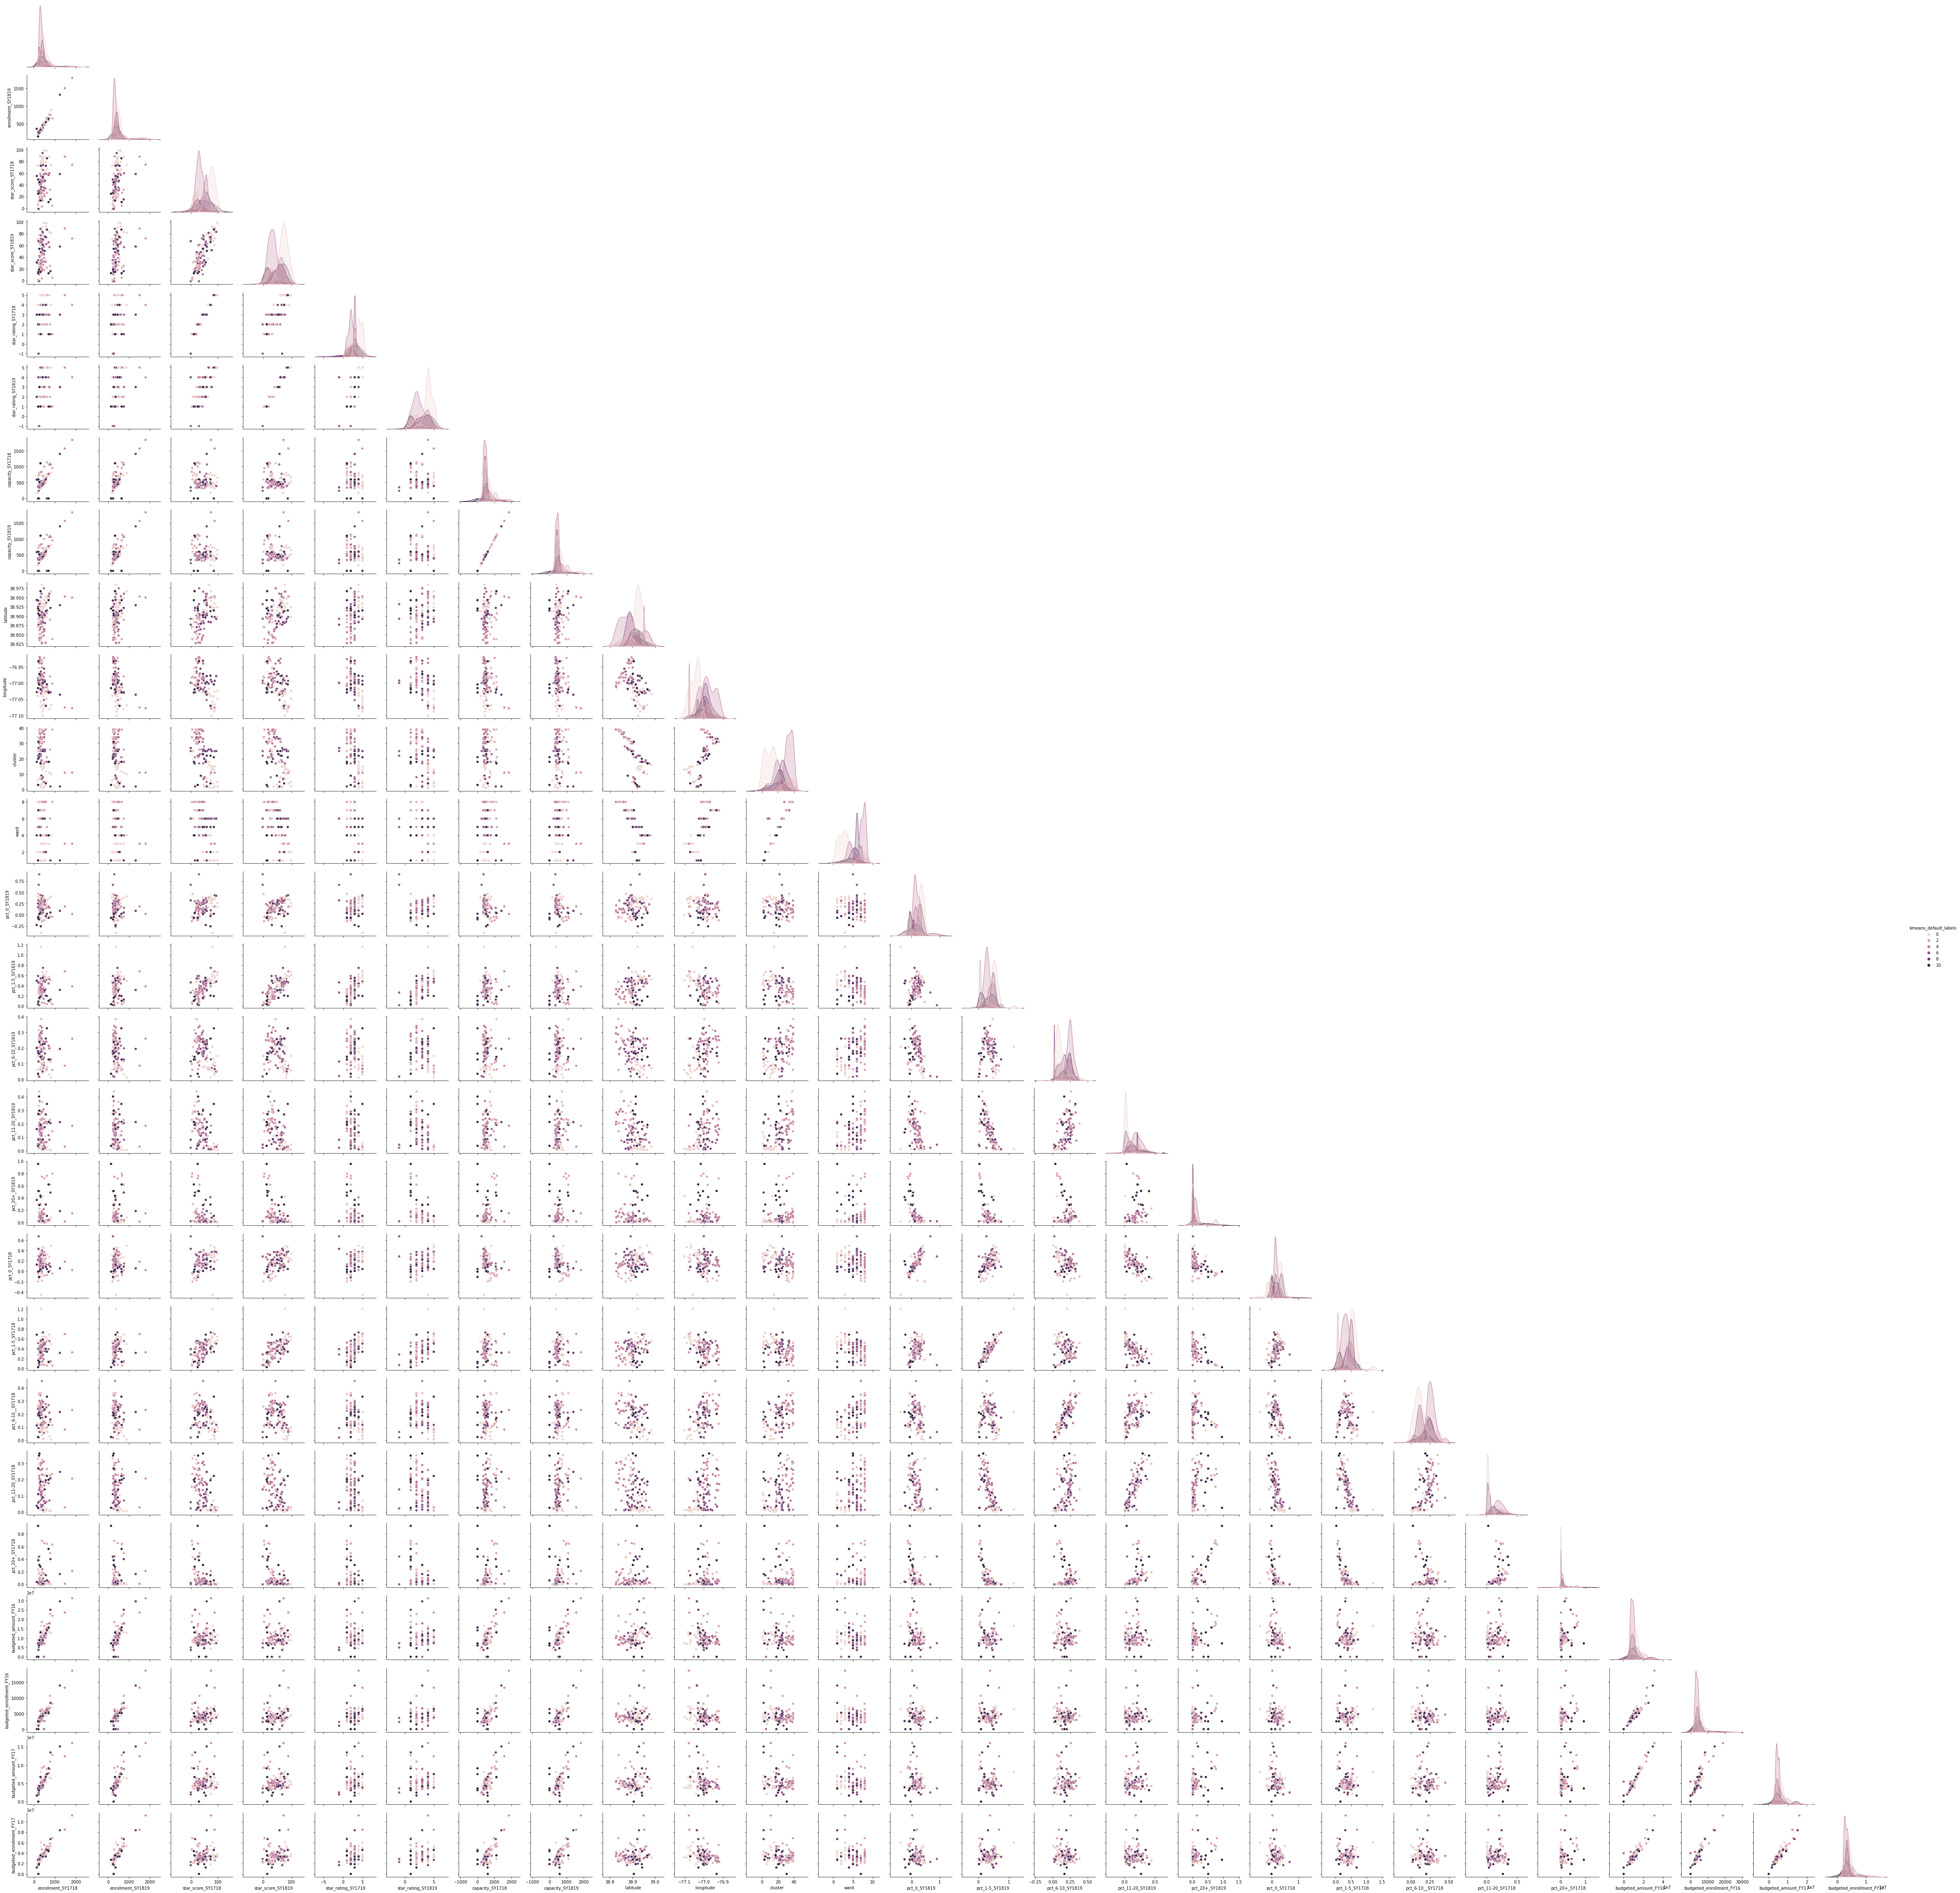

In [84]:
sns.pairplot(kmeans_df, hue='kmeans_default_labels', corner=True);
plt.savefig(f'kmeans_k=11_results')

In [81]:
kmeans_df.groupby('kmeans_default_labels').mean()

enrollment_SY1718  enrollment_SY1819  \
kmeans_default_labels                                         
0                             448.240000         458.800000   
1                             267.333333         299.333333   
2                             626.600000         562.400000   
3                            1652.000000        1651.500000   
4                             338.083333         326.750000   
5                             453.083333         450.166667   
6                             239.000000         257.000000   
7                             371.461538         383.076923   
8                            1014.000000        1033.000000   
9                             382.800000         410.300000   
10                            318.833333         310.833333   

                       star_score_SY1718  star_score_SY1819  \
kmeans_default_labels                                         
0                              73.526400          72.756000   
1                              14.628333          26.820000   
2                              18.056000          14.908000   
3                              81.340000          80.460000   
4                              30.612083          34.205833   
5                              50.060833          54.010833   
6                              14.345000          -1.000000   
7                              51.092308          60.343077   
8                              36.855000          37.145000   
9                              59.655000          57.621000   
10                             24.873333          21.426667   

                       star_rating_SY1718  star_rating_SY1819  \
kmeans_default_labels                                           
0                                4.120000            4.120000   
1                                1.500000            2.000000   
2                                1.600000            1.400000   
3                                4.500000            4.500000   
4                                2.083333            2.250000   
5                                2.833333            3.250000   
6                                0.500000           -1.000000   
7                                3.000000            3.538462   
8                                2.000000            2.000000   
9                                3.300000            3.500000   
10                               1.833333            1.333333   

                       capacity_SY1718  capacity_SY1819   latitude  longitude  \
kmeans_default_labels                                                           
0                           496.920000       500.920000  38.931174 -77.048491   
1                           779.333333       779.333333  38.871667 -76.970941   
2                          1005.400000      1005.400000  38.880682 -76.979829   
3                          1705.000000      1705.000000  38.951527 -77.076487   
4                           439.750000       443.916667  38.869344 -76.968742   
5                           597.833333       597.833333  38.934955 -77.015361   
6                           295.000000       295.000000  38.912586 -76.996087   
7                           449.000000       449.000000  38.889882 -76.984721   
8                          1235.000000      1235.000000  38.925859 -77.032164   
9                           452.900000       452.900000  38.914736 -77.005746   
10                          369.000000       369.000000  38.925753 -76.995514   

                       ...  pct_20+_SY1819  pct_0_SY1718  pct_1-5_SY1718  \
kmeans_default_labels  ...                                                 
0                      ...        0.034351      0.290001        0.571367   
1                      ...        0.121034     -0.132429        0.318342   
2                      ...        0.727887     -0.042707        0.079599   
3                      ...        0.081353      0.103958        0.510049   
4                      ... 

In [74]:
def find_best_silhouette_kmeans(df): 
    max_score=-1
    for k in range(1,20):
        kmeans = KMeans(n_clusters=k).fit(df)
        if len(set(kmeans.labels_)) > 1:
            score = silhouette_score(df, kmeans.labels_)
            nclusters = len(set(kmeans.labels_))
            if score > max_score:
                max_score = score
                inertia = kmeans.inertia_
                best_clusters = nclusters
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Model inertia was {inertia}')
    print(f'Model found {best_clusters} clusters.')
    return

In [75]:
def find_best_silhouette_dbscan(df): 
    max_score=-1     

    for eps in np.linspace(.2, 5, 50):
        for minsamples in range(2, len(df/2)):
            dbscan = DBSCAN(eps=eps, min_samples=minsamples)
            dbscan.fit(df)
            if len(set(dbscan.labels_)) > 1:
                score = silhouette_score(df, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_minsamples = minsamples
                    best_clusters = nclusters
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_minsamples}.')
    print(f'Model found {best_clusters} clusters.')
    return

In [68]:
find_best_silhouette_dbscan(X_ohe_ss)

Best silhouette score was 0.32
Best eps was 5.0
Best min_samples was 7.
Model found 2 clusters.


In [76]:
find_best_silhouette_kmeans(X_ohe_ss)

Best silhouette score was 0.28
Model inertia was 1053.4903980901763
Model found 11 clusters.


In [82]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ohe_ss)
    Sum_of_squared_distances.append(km.inertia_)

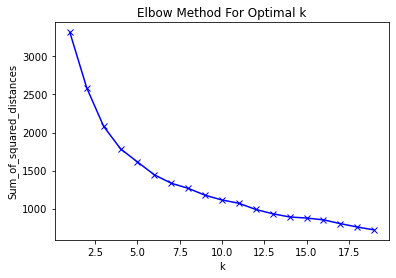

<Figure size 432x288 with 0 Axes>

In [117]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.savefig(f'elbow_plot_kmeans_results')

### Would have expected k cluster of closer to 6 not 11 ....

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA()
X_ohe_ss_pca = pca.fit_transform(X_ohe_ss)

In [121]:
X_ohe_ss_pca.shape

(107, 31)

In [122]:
pca.explained_variance_

array([9.23255172e+00, 7.98085561e+00, 3.10411808e+00, 2.19823442e+00,
       1.52864958e+00, 1.27106308e+00, 1.15063230e+00, 9.91575884e-01,
       6.12170731e-01, 5.49416864e-01, 5.05561345e-01, 4.26746118e-01,
       4.02624352e-01, 3.24929281e-01, 2.46060739e-01, 1.75691010e-01,
       1.56449265e-01, 1.00574168e-01, 8.08695151e-02, 6.93348109e-02,
       5.13718223e-02, 4.42116541e-02, 3.45419510e-02, 2.12571790e-02,
       1.78590473e-02, 7.48072059e-03, 6.66484423e-03, 9.56738071e-04,
       2.08547106e-18, 1.89712220e-18, 8.59033954e-32])

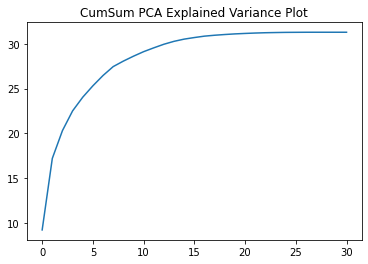

In [124]:
plt.plot(np.cumsum(pca.explained_variance_))
plt.title("CumSum PCA Explained Variance Plot");
plt.savefig(f'cumsum_plot_pca_results')

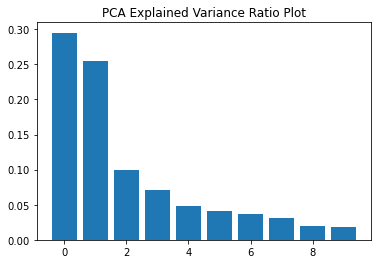

In [125]:
plt.bar(range(10), pca.explained_variance_ratio_[:10])
plt.title("PCA Explained Variance Ratio Plot");
plt.savefig(f'exp_var_ratio_plot_pca_results')

In [127]:
np.cumsum(pca.explained_variance_ratio_[:10])

array([0.29504084, 0.55008175, 0.64927877, 0.71952684, 0.76837727,
       0.80899611, 0.84576639, 0.87745377, 0.89701666, 0.91457414])

In [128]:
pca = PCA(4)
X_ohe_ss_pca = pca.fit_transform(X_ohe_ss)

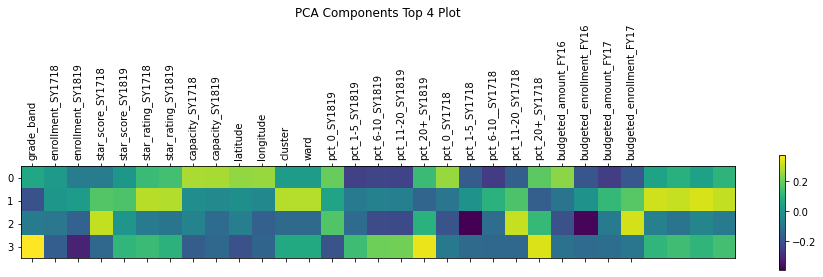

In [153]:
plt.matshow(pca.components_)
plt.xticks(range(len(X.columns)), X.columns, rotation = 90);
plt.colorbar();
plt.title("PCA Components Top 4 Plot");
plt.savefig(f'pca4_components_plot_results')

In [115]:
pca.components_

array([[ 7.09848812e-02,  2.35590320e-02, -6.63651173e-02,
        -6.59712041e-02,  1.45367264e-02,  1.31925213e-01,
         1.47489922e-01,  2.79037751e-01,  2.75928774e-01,
         2.52961645e-01,  2.57561358e-01,  3.26011003e-02,
         3.33796024e-02,  1.97881218e-01, -2.38356187e-01,
        -2.31148029e-01, -2.35461514e-01,  1.31881982e-01,
         2.59422086e-01, -1.66258905e-01, -2.58847531e-01,
        -1.58742815e-01,  1.82561452e-01,  2.43299941e-01,
        -1.84968025e-01, -2.51271837e-01, -1.83483459e-01,
         5.57313689e-02,  9.66732151e-02,  4.83658257e-02,
         1.09854057e-01],
       [-1.98755008e-01,  1.59588538e-02,  2.90993936e-02,
         1.71658815e-01,  1.61207798e-01,  2.96033016e-01,
         2.87158685e-01, -1.31589201e-02, -3.07300582e-02,
        -8.19757768e-03, -3.18688116e-02,  2.90606873e-01,
         2.90348145e-01,  5.76982826e-02, -7.84637166e-02,
        -5.37594409e-02, -5.83901666e-02, -1.39544952e-01,
        -9.00489072e-02, -2.30

In [116]:
pca.components_.sum(axis = 1)

array([ 0.80476253,  2.47304632, -1.95405422,  0.29406086])